In [19]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import RootMeanSquaredError

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
rating = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Dataset_Review_Restaurant.xlsx')

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")
place = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Dataset_Restaurant.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
place.head(10)

,Place_ID,Place,Image,URL,Rating,Num_Rating,Category,Address,Longitude,Latitude,Label_Kecamatan
0,11,Mr.K Cafe Gombel,https://lh5.googleusercontent.com/p/AF1QipOh43...,https://www.google.com/maps/place/Mr.K+Cafe+Go...,4.5,6235,Restoran,Jl. Setia Budi No.28,110.418685,-7.038795,1
1,12,Super Penyet Setiabudi,https://lh5.googleusercontent.com/p/AF1QipMufn...,https://www.google.com/maps/place/Super+Penyet...,4.4,5702,Ayam,Jl. Setia Budi No.207,110.411722,-7.058634,1
2,13,Sim Six (Sim-6) garden Resto Ngesrep timur,https://lh5.googleusercontent.com/p/AF1QipPfQx...,https://www.google.com/maps/place/Sim+Six+%28S...,4.5,4265,Restoran,Jl. Ngesrep Tim. V No.25,110.417238,-7.064682,1
3,14,Sowak (Sop Iwak),https://lh5.googleusercontent.com/p/AF1QipPKYy...,https://www.google.com/maps/place/Sowak+%28Sop...,4.4,4251,Rumah Makan,Jl. Banjarsari Selatan No.18,110.432990,-7.061215,1
4,15,Warung Lesehan Fifty Fifty Sumurboto Banyumanik,https://lh5.googleusercontent.com/p/AF1QipNxvJ...,https://www.google.com/maps/place/Warung+Leseh...,4.3,3822,Jawa,Jl. Ngesrep Tim. V No.118,110.426369,-7.053008,1
5,16,Pizza Hut Restoran,https://lh5.googleusercontent.com/p/AF1QipOQ_y...,https://www.google.com/maps/place/Pizza+Hut+Re...,4.5,3481,Pizza,Jl. Setia Budi No.196,110.409513,-7.064682,1
6,17,"Waroeng Spesial Sambal ""SS"" Tembalang",https://lh5.googleusercontent.com/p/AF1QipMxi8...,https://www.google.com/maps/place/Waroeng+Spes...,4.3,3440,Rumah Makan,Jl. Tirto Agung No.32,110.418415,-7.046610,1
7,18,Lesehan Aldan Cabang Semarang,https://lh5.googleusercontent.com/p/AF1QipPRTZ...,https://www.google.com/maps/place/Lesehan+Alda...,4.3,2501,Restoran,Jl. Ngesrep Tim. V No.44,110.419107,-7.062919,1
8,19,Mie Clubbing Erlangga,https://lh5.googleusercontent.com/p/AF1QipOce4...,https://www.google.com/maps/place/Mie+Clubbing...,4.3,2408,Mi,Jl. Tirto Agung No.69,110.414268,-7.069729,1
9,110,KANE Semarang,https://lh5.googleusercontent.com/p/AF1QipPJvd...,https://www.google.com/maps/place/KANE+Semaran...,4.4,2402,Restoran,Jl. Jatimulyo No.8,110.430962,-7.057095,1


In [5]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Place_ID         159 non-null    int64  
 1   Place            159 non-null    object 
 2   Image            158 non-null    object 
 3   URL              159 non-null    object 
 4   Rating           159 non-null    float64
 5   Num_Rating       159 non-null    int64  
 6   Category         159 non-null    object 
 7   Address          157 non-null    object 
 8   Longitude        159 non-null    float64
 9   Latitude         159 non-null    float64
 10  Label_Kecamatan  159 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 13.8+ KB


In [6]:
rating.head(10)

,User_ID,Place_ID,Rating,Place
0,1,12,1,Super Penyet Setiabudi
1,1,13,1,Sim Six (Sim-6) garden Resto Ngesrep timur
2,1,13,3,Sim Six (Sim-6) garden Resto Ngesrep timur
3,1,29,4,AROEM RESTAURANT & BALLROOM
4,1,31,4,The Tavern
5,1,32,2,Waroeng Steak & Shake Sampangan Semarang
6,1,36,1,Lind's Ice Cream & Resto
7,1,44,2,Pondok Makan Sederhana
8,1,83,5,Waroeng Steak and Shake Ngaliyan
9,1,103,5,Bakso Geger Semarang


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511324 entries, 0 to 511323
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User_ID   511324 non-null  int64 
 1   Place_ID  511324 non-null  int64 
 2   Rating    511324 non-null  int64 
 3   Place     511324 non-null  object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB


In [8]:
df = rating.copy()
df.head()

,User_ID,Place_ID,Rating,Place
0,1,12,1,Super Penyet Setiabudi
1,1,13,1,Sim Six (Sim-6) garden Resto Ngesrep timur
2,1,13,3,Sim Six (Sim-6) garden Resto Ngesrep timur
3,1,29,4,AROEM RESTAURANT & BALLROOM
4,1,31,4,The Tavern


In [9]:
user_ids = df['User_ID'].unique().tolist()
user_id_mapping = {user_id: index for index, user_id in enumerate(user_ids)}
user_encoded_to_user = {index: user_id for index, user_id in enumerate(user_ids)}

In [10]:
place_ids = df['Place_ID'].unique().tolist()
place_id_mapping = {place_id: index for index, place_id in enumerate(place_ids)}
place_encoded_to_place = {index: place_id for index, place_id in enumerate(place_ids)}

In [11]:
df['user'] = df['User_ID'].map(user_id_mapping)
df['place'] = df['Place_ID'].map(place_id_mapping)

In [12]:
# Mendapatkan jumlah user dan place
num_users, num_places = len(user_id_mapping), len(user_id_mapping)
 
# Mengubah rating menjadi nilai float
df['Rating'] = df['Rating'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Rating']), max(df['Rating'])
 
print(f'Number of User: {num_users}, Number of Place: {num_places}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 18002, Number of Place: 18002, Min Rating: 1.0, Max Rating: 5.0


In [13]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(5)

,User_ID,Place_ID,Rating,Place,user,place
70403,2475,138,3.0,Warung Makan Bebek H Slamet(asli).CABANG PERTA...,2474,97
456035,16055,21,1.0,Mie Clubbing Erlangga,16054,53
279527,9842,121,2.0,McDonald's Pandanaran,9841,12
92355,3251,23,1.0,Ikan Bakar Cianjur,3250,42
444823,15659,102,2.0,McDonald's,15658,105


In [14]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Rating'].values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [15]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_places = num_places
        self.embedding_size = embedding_size
        
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        self.places_embedding = tf.keras.layers.Embedding(
            num_places,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.places_bias = tf.keras.layers.Embedding(num_places, 1)
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        places_vector = self.places_embedding(inputs[:, 1])
        places_bias = self.places_bias(inputs[:, 1])
        
        dot_user_places = tf.reduce_sum(tf.multiply(user_vector, places_vector), axis=1, keepdims=True)
        
        x = dot_user_places + user_bias + places_bias
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        output = self.output_layer(x)
        
        return output


In [21]:
model = RecommenderNet(num_users, num_places, 64) # inisialisasi model
 
# model compile

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001), 
    loss='mse', metrics=[RootMeanSquaredError()])

In [24]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=256, 
    epochs=5,
    validation_split=0.2,
    shuffle=True)

Epoch 1/5
1279/1279 [==============================] - 42s 33ms/step - loss: 6.0008 - root_mean_squared_error: 2.4497 - val_loss: 5.9921 - val_root_mean_squared_error: 2.4479
Epoch 2/5
1279/1279 [==============================] - 42s 32ms/step - loss: 6.0008 - root_mean_squared_error: 2.4497 - val_loss: 5.9921 - val_root_mean_squared_error: 2.4479
Epoch 3/5
1279/1279 [==============================] - 44s 34ms/step - loss: 6.0008 - root_mean_squared_error: 2.4497 - val_loss: 5.9921 - val_root_mean_squared_error: 2.4479
Epoch 4/5
1279/1279 [==============================] - 44s 34ms/step - loss: 6.0008 - root_mean_squared_error: 2.4497 - val_loss: 5.9921 - val_root_mean_squared_error: 2.4479
Epoch 5/5
1279/1279 [==============================] - 43s 33ms/step - loss: 6.0008 - root_mean_squared_error: 2.4497 - val_loss: 5.9921 - val_root_mean_squared_error: 2.4479


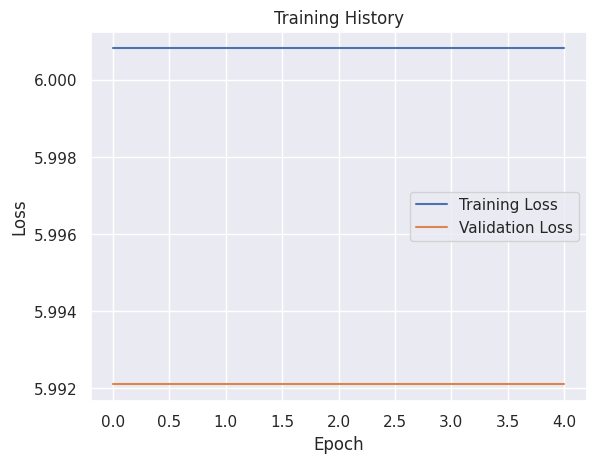

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
#model.save_weights('content_model_weights', save_format='tf')
model.save("saved_model", save_format='tf')

In [30]:
#loaded_model = RecommenderNet(num_users, num_places, 50)
#loaded_model.load_weights('content_model_weights')
loaded_model = tf.keras.models.load_model('./saved_model')

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('Model_Rekomendasi_Tempat_Makan.tflite', 'wb') as f:
  f.write(tflite_model)

In [32]:
# Menyiapkan dataframe
place_df = place[['Place_ID','Place','Category','Rating','Address']]
place_df.columns = ['id','place_name','category','rating','address']
df = rating.copy()

In [33]:
# Mengambil sample user
user_id = df.User_ID.sample().iloc[0]
place_visited_by_user = df[df.User_ID == user_id]

In [34]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_ID.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_id_mapping.keys()))
)
 
place_not_visited = [[place_id_mapping.get(x)] for x in place_not_visited]
user_encoder = user_id_mapping.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
# Mengambil top 7 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('')
print('----' * 15)
print('Top 7 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,11)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Alamat', row.address, ',', 'Rating Tempat', row.rating,'\n')

print('==='*15)